In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re


In [2]:
# read the file and make dateframe
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# making a copy
titanic_df = df.copy()


In [4]:
# looking and the data types, rows and coluns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# changing values in embark from 	C = Cherbourg, Q = Queenstown, S = Southampton
titanic_df['Embarked'] = titanic_df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [6]:
# change pClass to passagerClass
titanic_df.rename(columns={'Pclass': 'PassagerClass'}, inplace=True)

In [7]:
titanic_df.head()

,PassengerId,Survived,PassagerClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [8]:
# funcation to extract the title in name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return None

In [9]:
# apply the funciton to create column for the title
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

In [10]:
# dropping passagerId, name, cabin, tickets.  the columns that are not fit for what we need.
titanic_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)


In [11]:
titanic_df.head()

,Survived,PassagerClass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,Southampton,Mr
1,1,1,female,38.0,1,0,71.2833,Cherbourg,Mrs
2,1,3,female,26.0,0,0,7.9250,Southampton,Miss
3,1,1,female,35.0,1,0,53.1000,Southampton,Mrs
4,0,3,male,35.0,0,0,8.0500,Southampton,Mr


In [12]:
# check for missing values
titanic_df.isnull().sum()

Survived           0
PassagerClass      0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Title              0
dtype: int64

In [13]:
# filling age with the mediam
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [14]:
# fill missing emarked with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [15]:
# check for missing values
titanic_df.isnull().sum()

Survived         0
PassagerClass    0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64

# Sumarry Staticts
 provide a quick overview of the main characteristics of a dataset

### A) Unvariate Analysis
 provides summary statistics and visualizations to understand the distribution and characteristics of a single variable.

In [16]:
# summary statistics for numerical columns
titanic_df.describe()

,Survived,PassagerClass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# summary statis for categorical columns
titanic_df.describe(include=['O'])

,Sex,Embarked,Title
count,891,891,891
unique,2,3,17
top,male,Southampton,Mr
freq,577,646,517


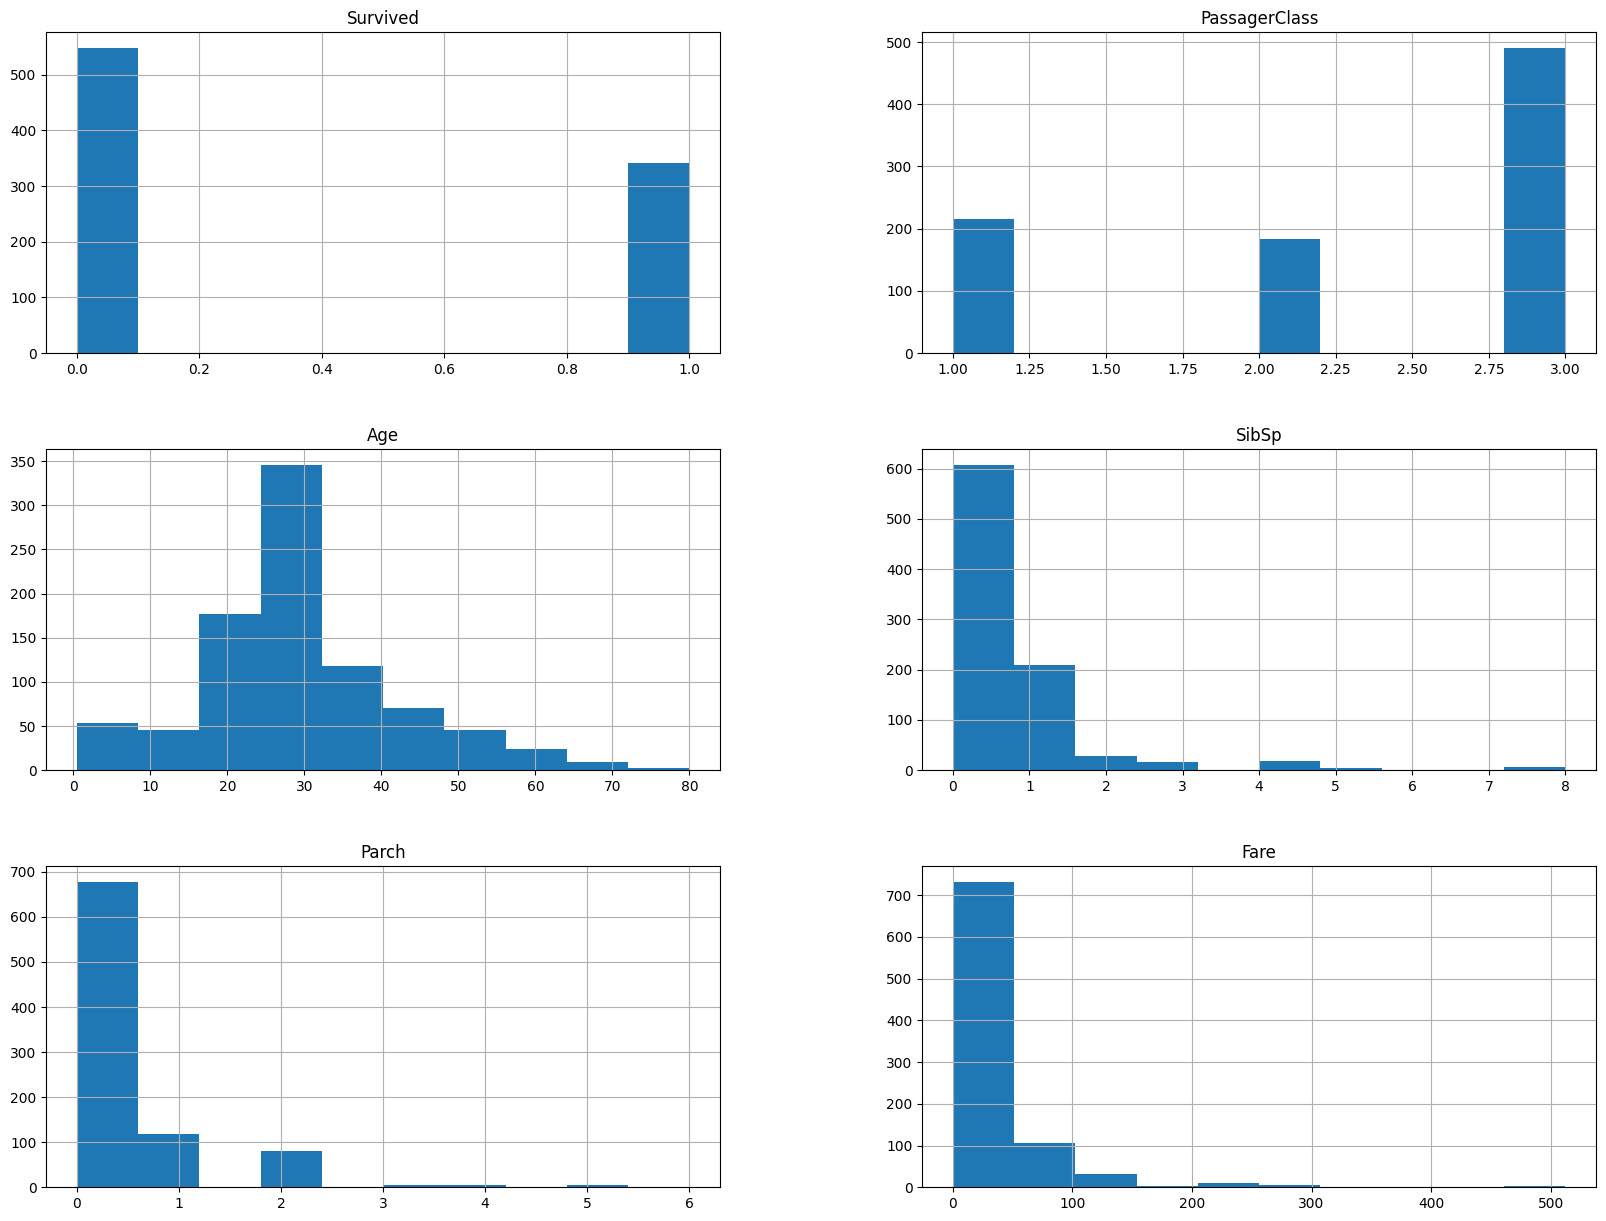

In [18]:
# histograms for numberica features
titanic_df.hist(figsize=(20,15))
plt.show()

**Insights**
 Key insights include a higher number of non-survivors, a predominance of third-class passengers, a concentration of passengers in their 20s and 30s, and a majority of passengers with no or one sibling/spouse and minimal parents/children aboard. The fare distribution is heavily right-skewed with most fares being low.

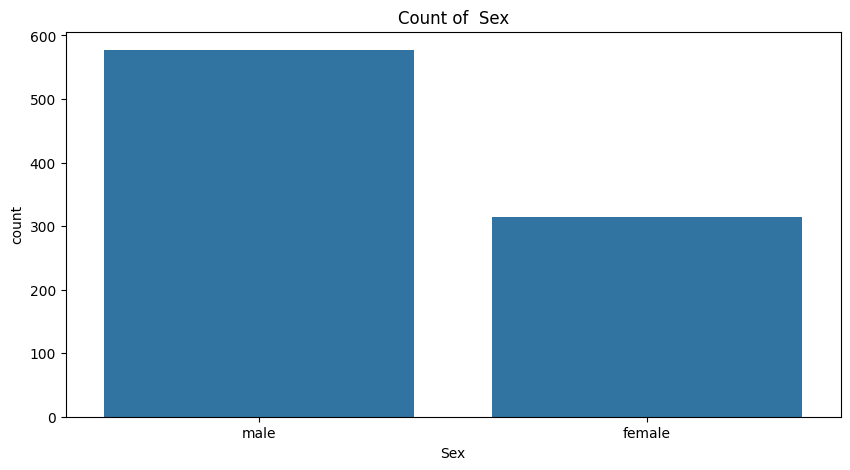

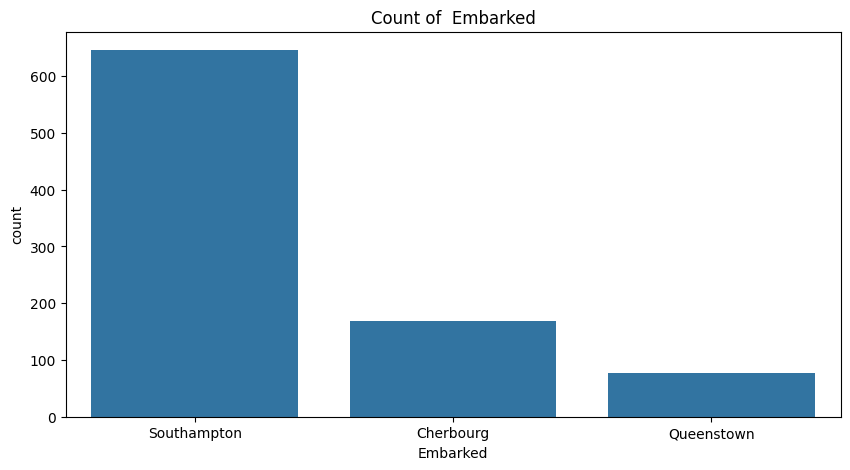

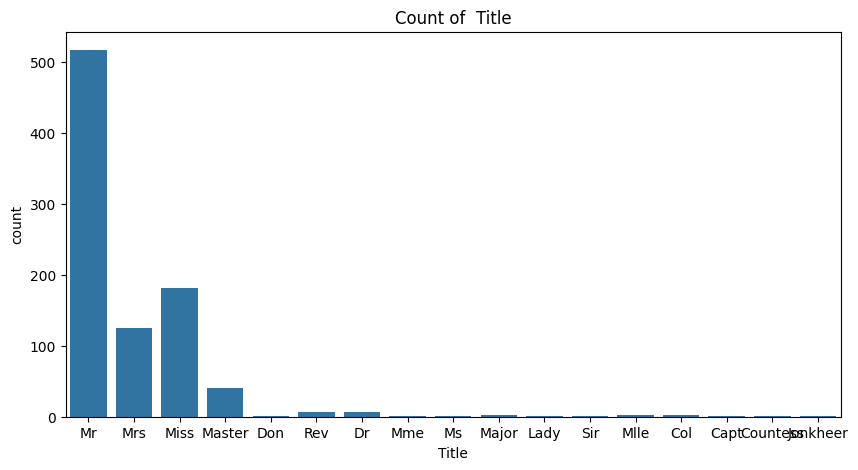

In [19]:
# count charts for categorical variables
categorical_vars = ['Sex',  'Embarked', 'Title']
for var in categorical_vars:
  plt.figure(figsize=(10,5))
  sns.countplot(x=var, data=titanic_df)
  plt.title(f'Count of  {var}')
  plt.show()


**Insights**

This set of histograms provides a univariate analysis of the Titanic dataset, highlighting the distribution of passengers' survival status, class, age, number of siblings/spouses, number of parents/children, and fare paid. The charts show notable trends such as a higher number of third-class passengers, a right-skewed distribution in age and fare, and most passengers having few or no relatives aboard.

### B)Bivariate Analysis
Bivariate analysis examines the interactions and correlations between pairs of variables.

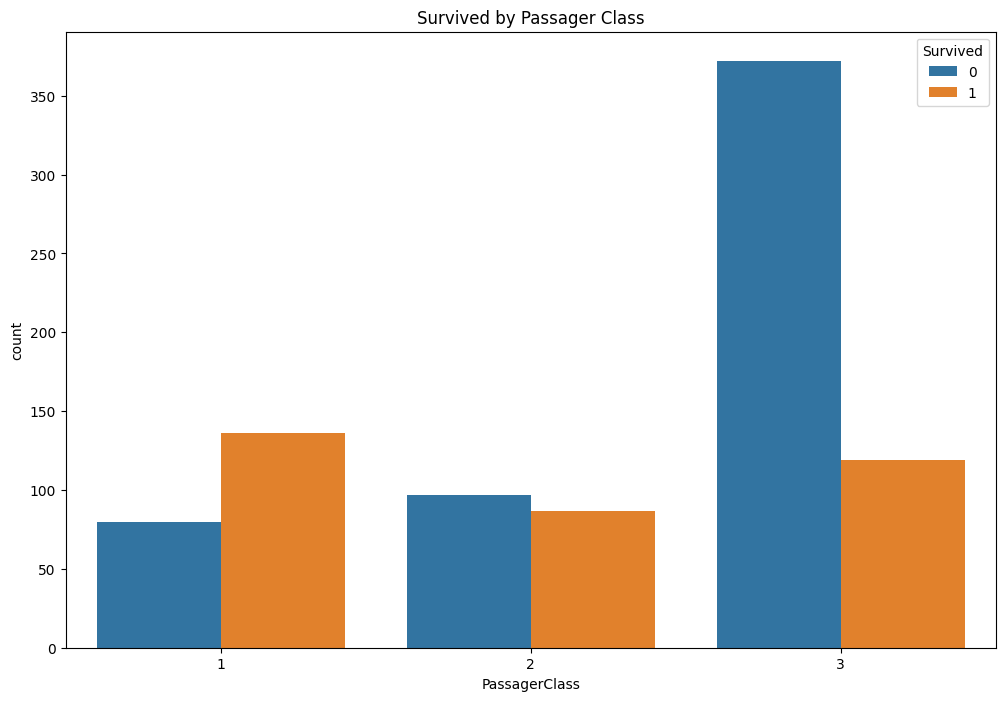

In [20]:
# create a count bar chart for survied by passager class
plt.figure(figsize=(12,8))
sns.countplot(x='PassagerClass', hue='Survived', data=titanic_df)
plt.title('Survived by Passager Class')
plt.show()

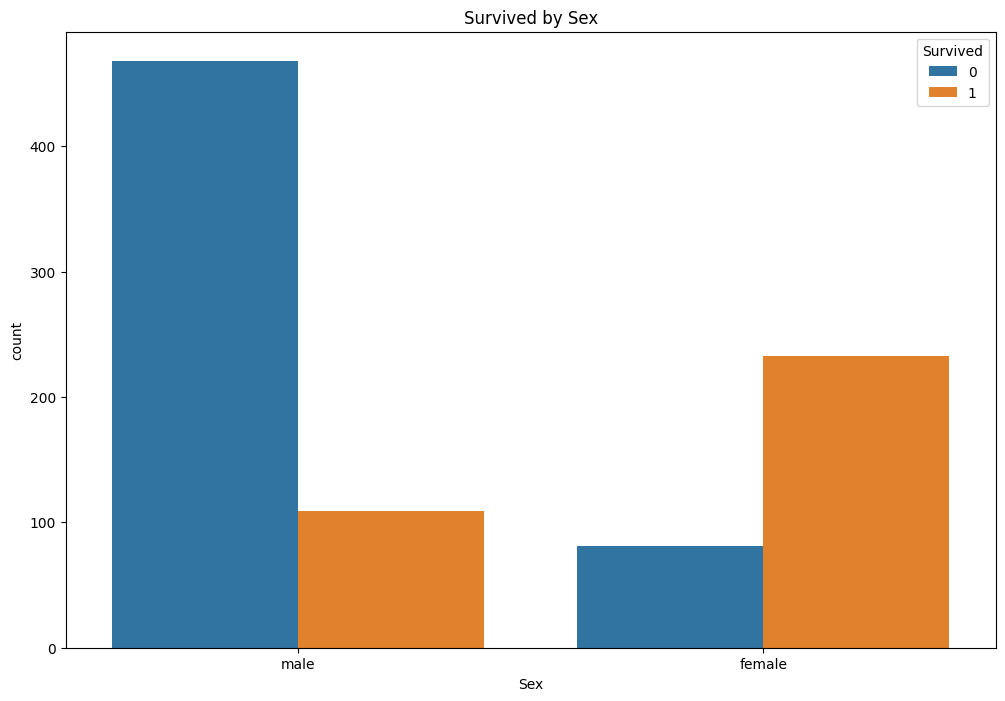

In [21]:
# count bar chart survied by sex
plt.figure(figsize=(12,8))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survived by Sex')
plt.show()

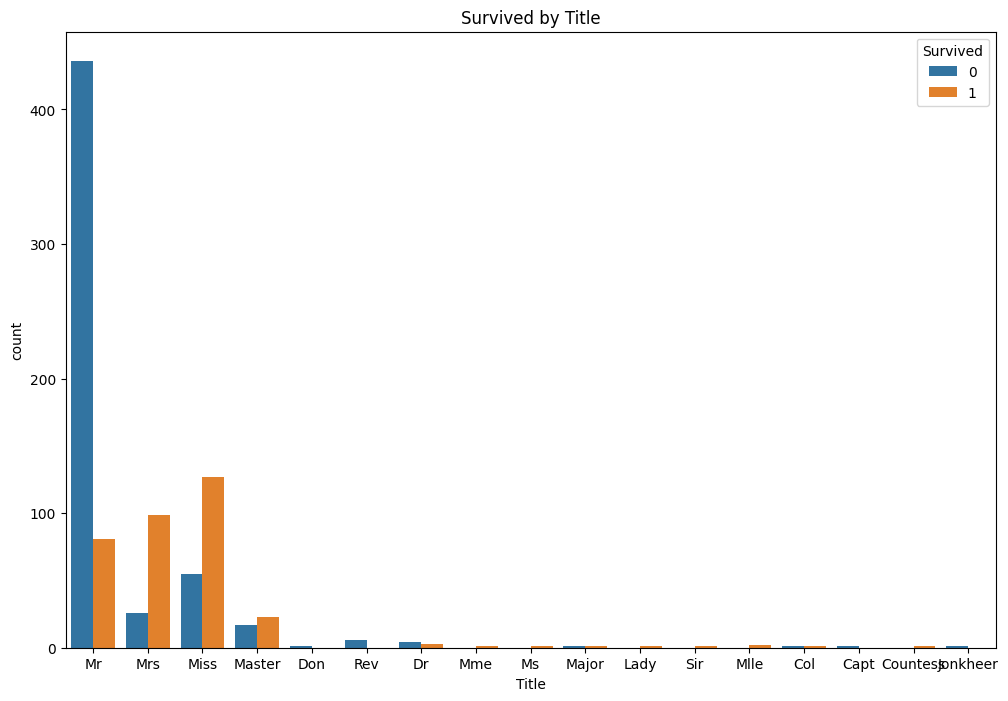

In [22]:
# create a bar count chart for titles by survived
plt.figure(figsize=(12,8))
sns.countplot(x='Title', hue='Survived', data=titanic_df)
plt.title('Survived by Title')
plt.show()

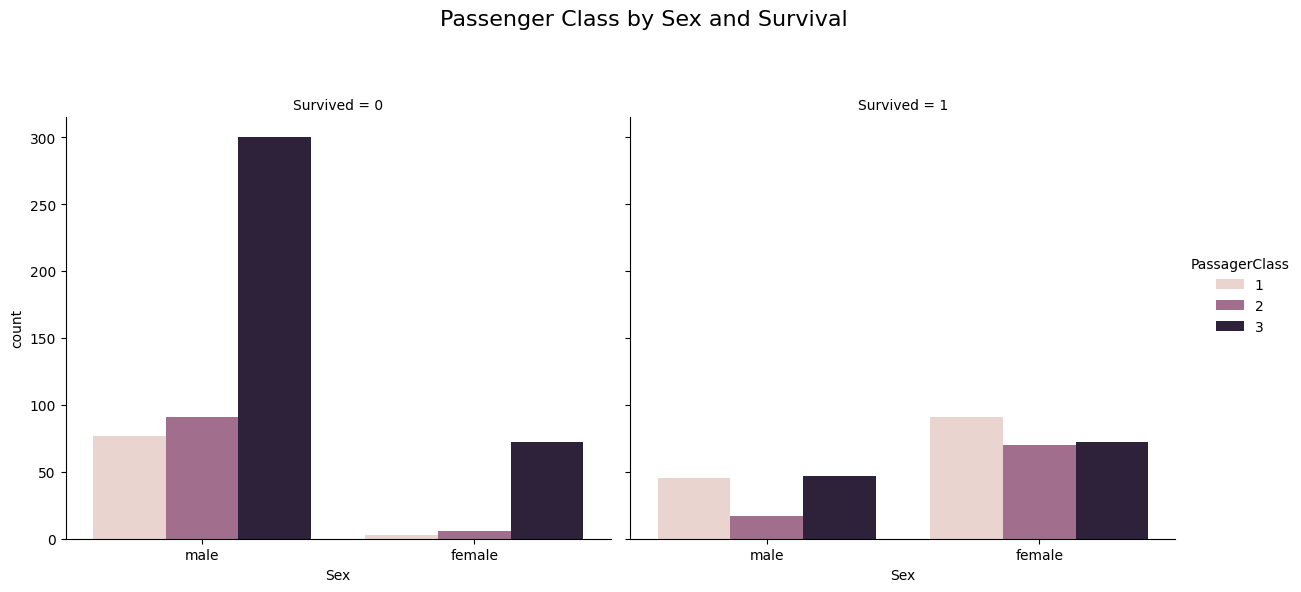

In [23]:
# Create a catplot to show the relationship between sex, passenger class, and survival
sns.catplot(x="Sex", hue="PassagerClass", col="Survived", data=titanic_df, kind="count", height=6, aspect=1)

# Set the title of the plot
plt.subplots_adjust(top=0.8)
plt.suptitle('Passenger Class by Sex and Survival', fontsize=16)

# Show the plot
plt.show()

**Insights**

a significant majority of third-class males did not survive, as evidenced by the tall bar on the left. Conversely, among those who survived, first-class females constitute a substantial portion, highlighting the higher survival rate among women and children, particularly those in first class. Additionally, the overall survival rate was much higher for females across all classes compared to males.

In [27]:
fare_bins = pd.qcut(titanic_df['Fare'], 10)
titanic_df['FareBin'] = fare_bins

#display the bin edges
bins_eges = fare_bins.cat.categories
print(bins)

NameError: name 'bins' is not defined

In [26]:
for edge in bins_eges :
  print(edge)

(-0.001, 7.55]
(7.55, 7.854]
(7.854, 8.05]
(8.05, 10.5]
(10.5, 14.454]
(14.454, 21.679]
(21.679, 27.0]
(27.0, 39.688]
(39.688, 77.958]
(77.958, 512.329]


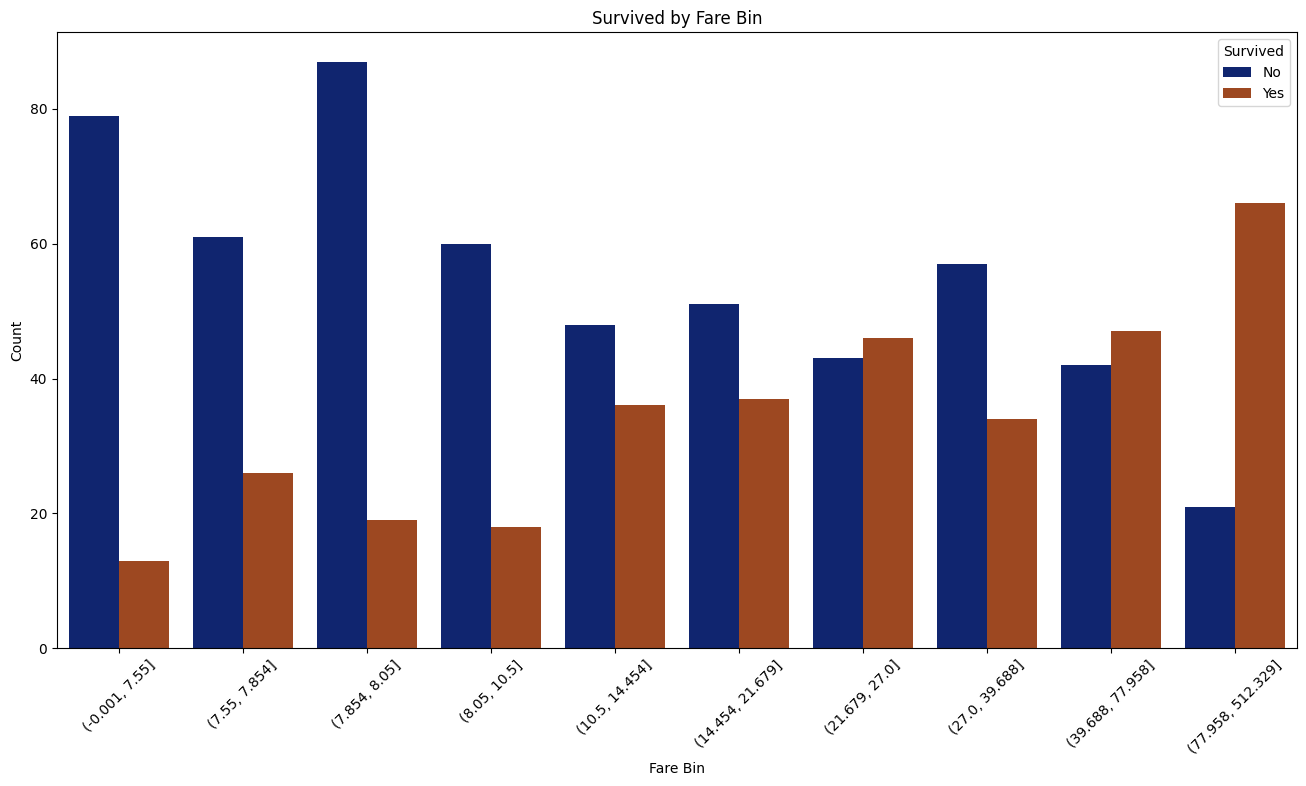

In [28]:
# create count chart for suvired by farbin and sex
plt.figure(figsize=(16,8))
count_plot = sns.countplot(x='FareBin', hue='Survived', data=titanic_df, palette = 'dark')
plt.title('Survived by Fare Bin')
plt.xlabel('Fare Bin')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


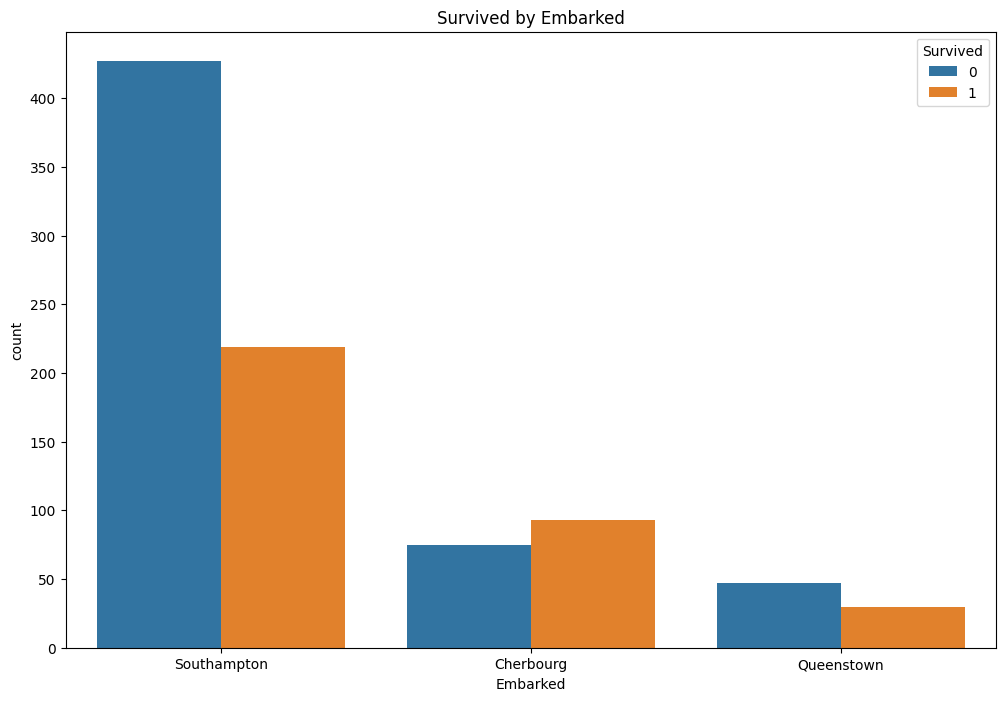

In [29]:
# create a count chart with embarked by survied
plt.figure(figsize=(12,8))
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survived by Embarked')
plt.show()

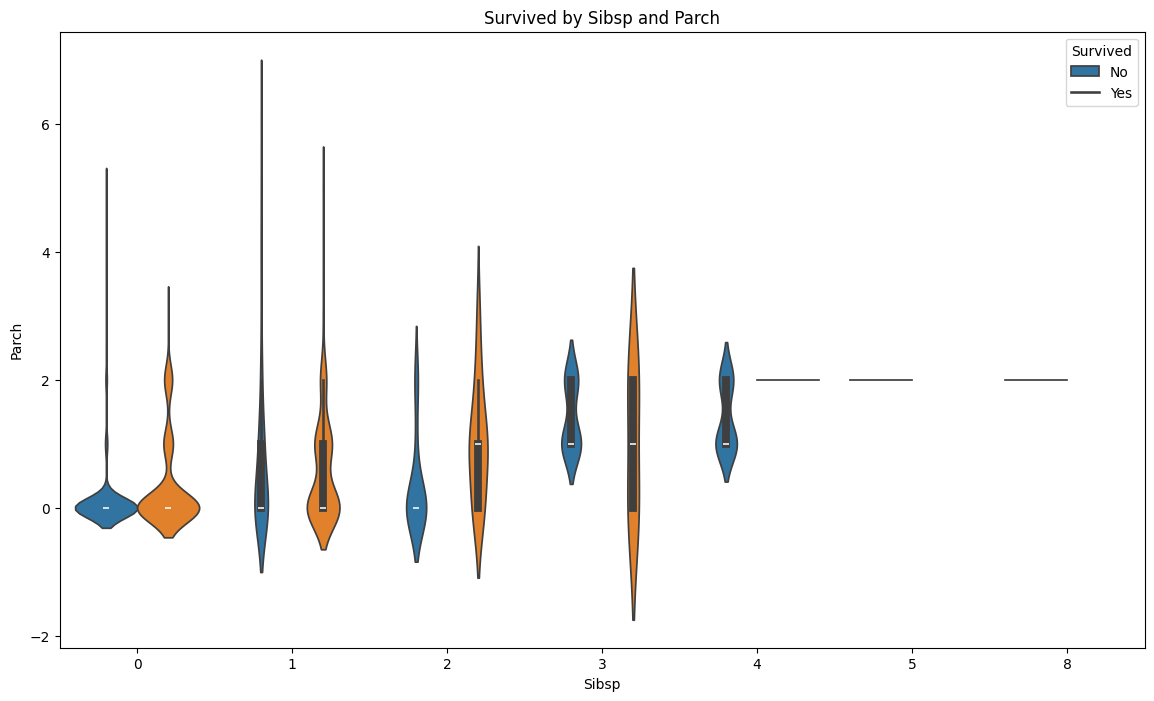

In [30]:
plt.figure(figsize=(14,8))
sns.violinplot(x='SibSp', y='Parch', hue='Survived', data=titanic_df)
plt.title('Survived by Sibsp and Parch')
plt.xlabel('Sibsp')
plt.ylabel('Parch')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Insights**

The plots indicate that passengers with fewer relatives (SibSp and Parch counts of 0 or 1) had a higher chance of survival, particularly noticeable in the '0' and '1' categories where the density for survivors (Yes) is prominent. Conversely, passengers with larger families (higher SibSp and Parch counts) had lower survival rates, as seen by the more dominant density of non-survivors (No) in these categories.








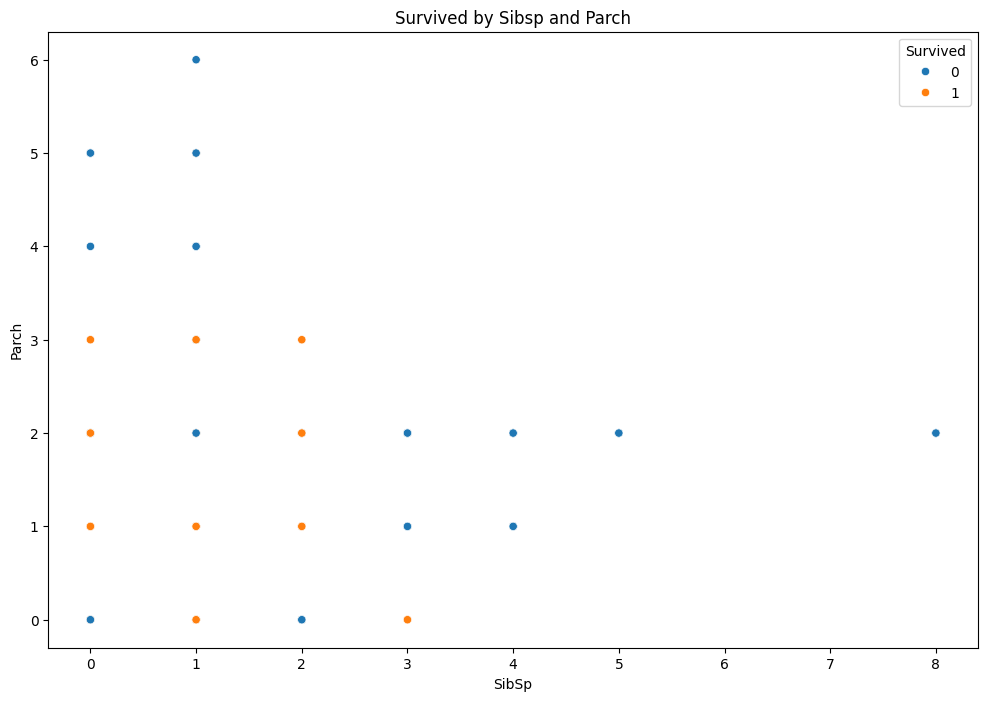

In [31]:
# scatter plot with partch and siblinings by suvived
plt.figure(figsize=(12,8))
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=titanic_df)
plt.title('Survived by Sibsp and Parch')
plt.show()

In [32]:
# Calculate the average fare and passenger class by survival status
avg_fare_passenger_class = titanic_df.groupby(['Survived', 'PassagerClass'])['Fare'].mean().reset_index()

print(avg_fare_passenger_class)

   Survived  PassagerClass       Fare
0         0              1  64.684007
1         0              2  19.412328
2         0              3  13.669364
3         1              1  95.608029
4         1              2  22.055700
5         1              3  13.694887


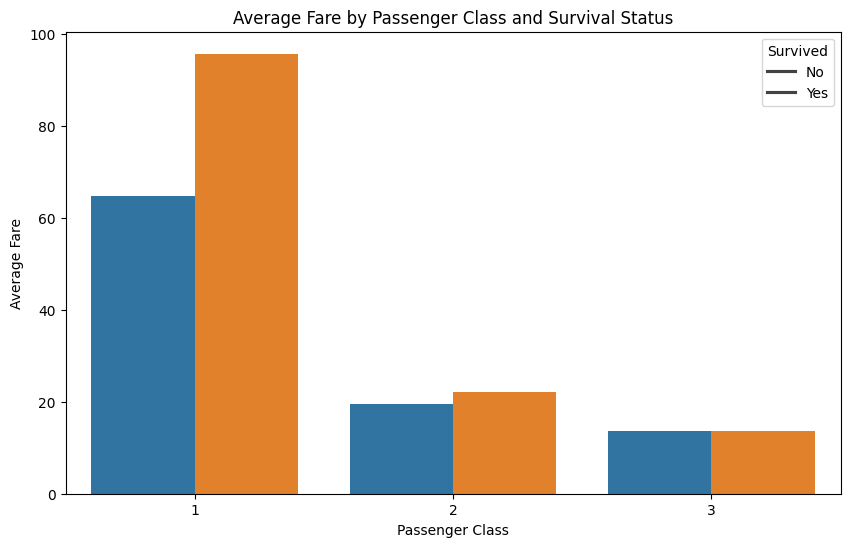

In [33]:
# Plotting the average fare by passenger class and survival status
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_fare_passenger_class, x='PassagerClass', y='Fare', hue='Survived')
plt.title('Average Fare by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<Figure size 1400x800 with 0 Axes>

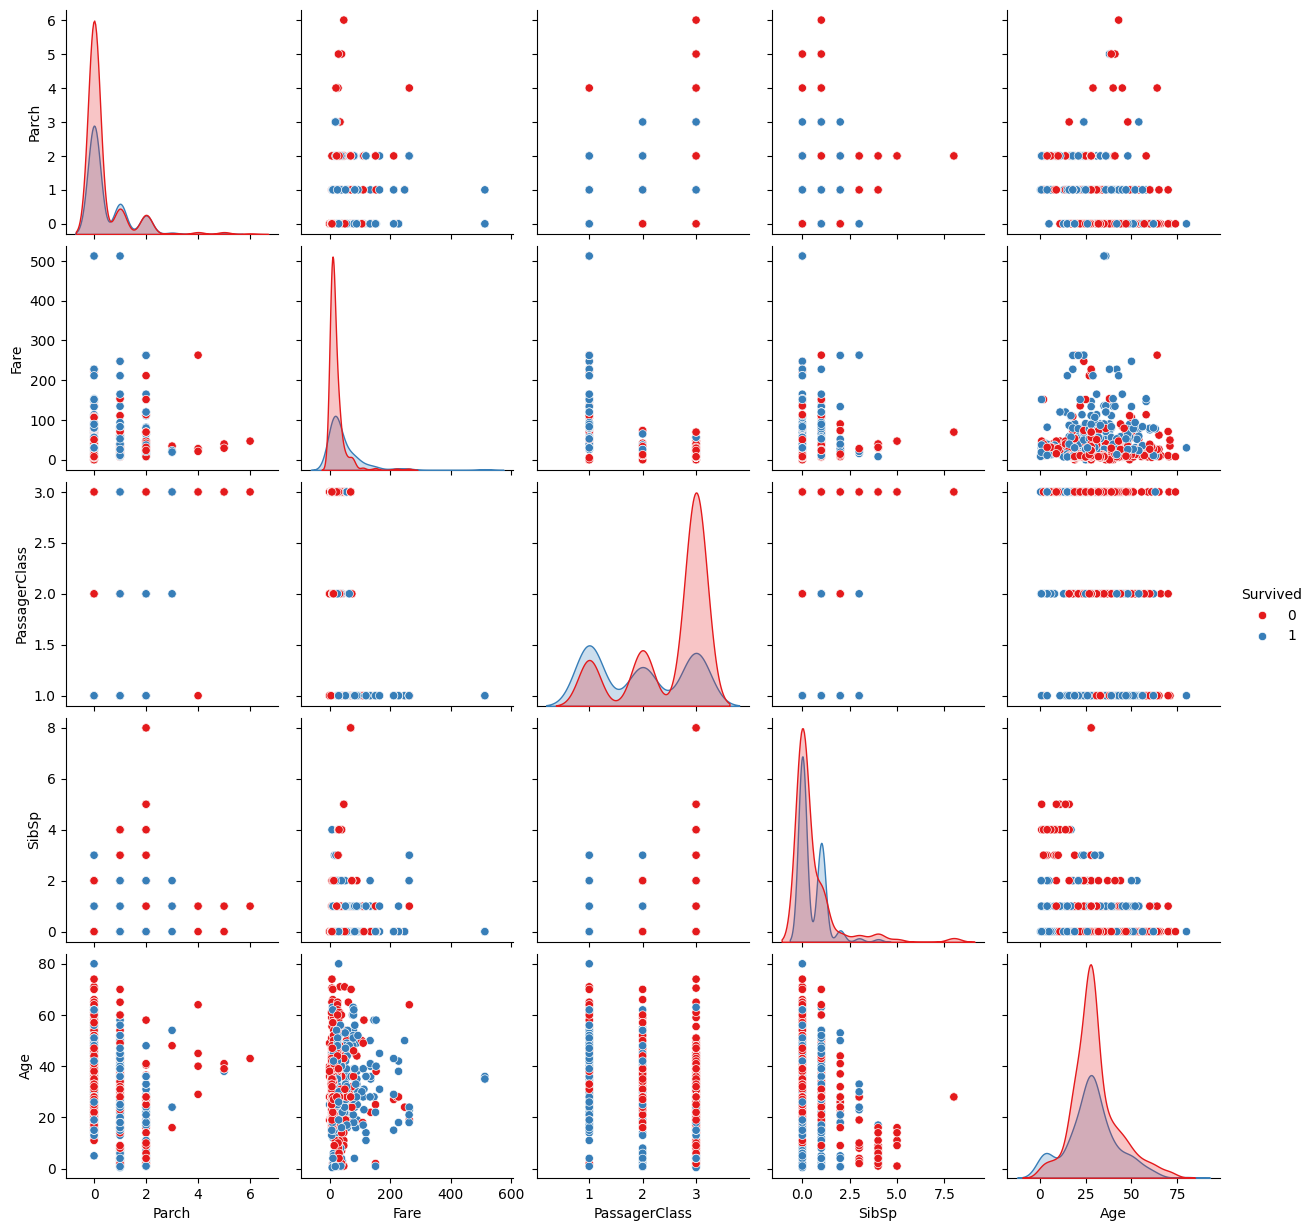

In [34]:
plt.figure(figsize=(14,8))
sns.pairplot(titanic_df, hue='Survived', vars = ['Parch', 'Fare', 'PassagerClass','SibSp', 'Age'], palette='Set1')
plt.show()


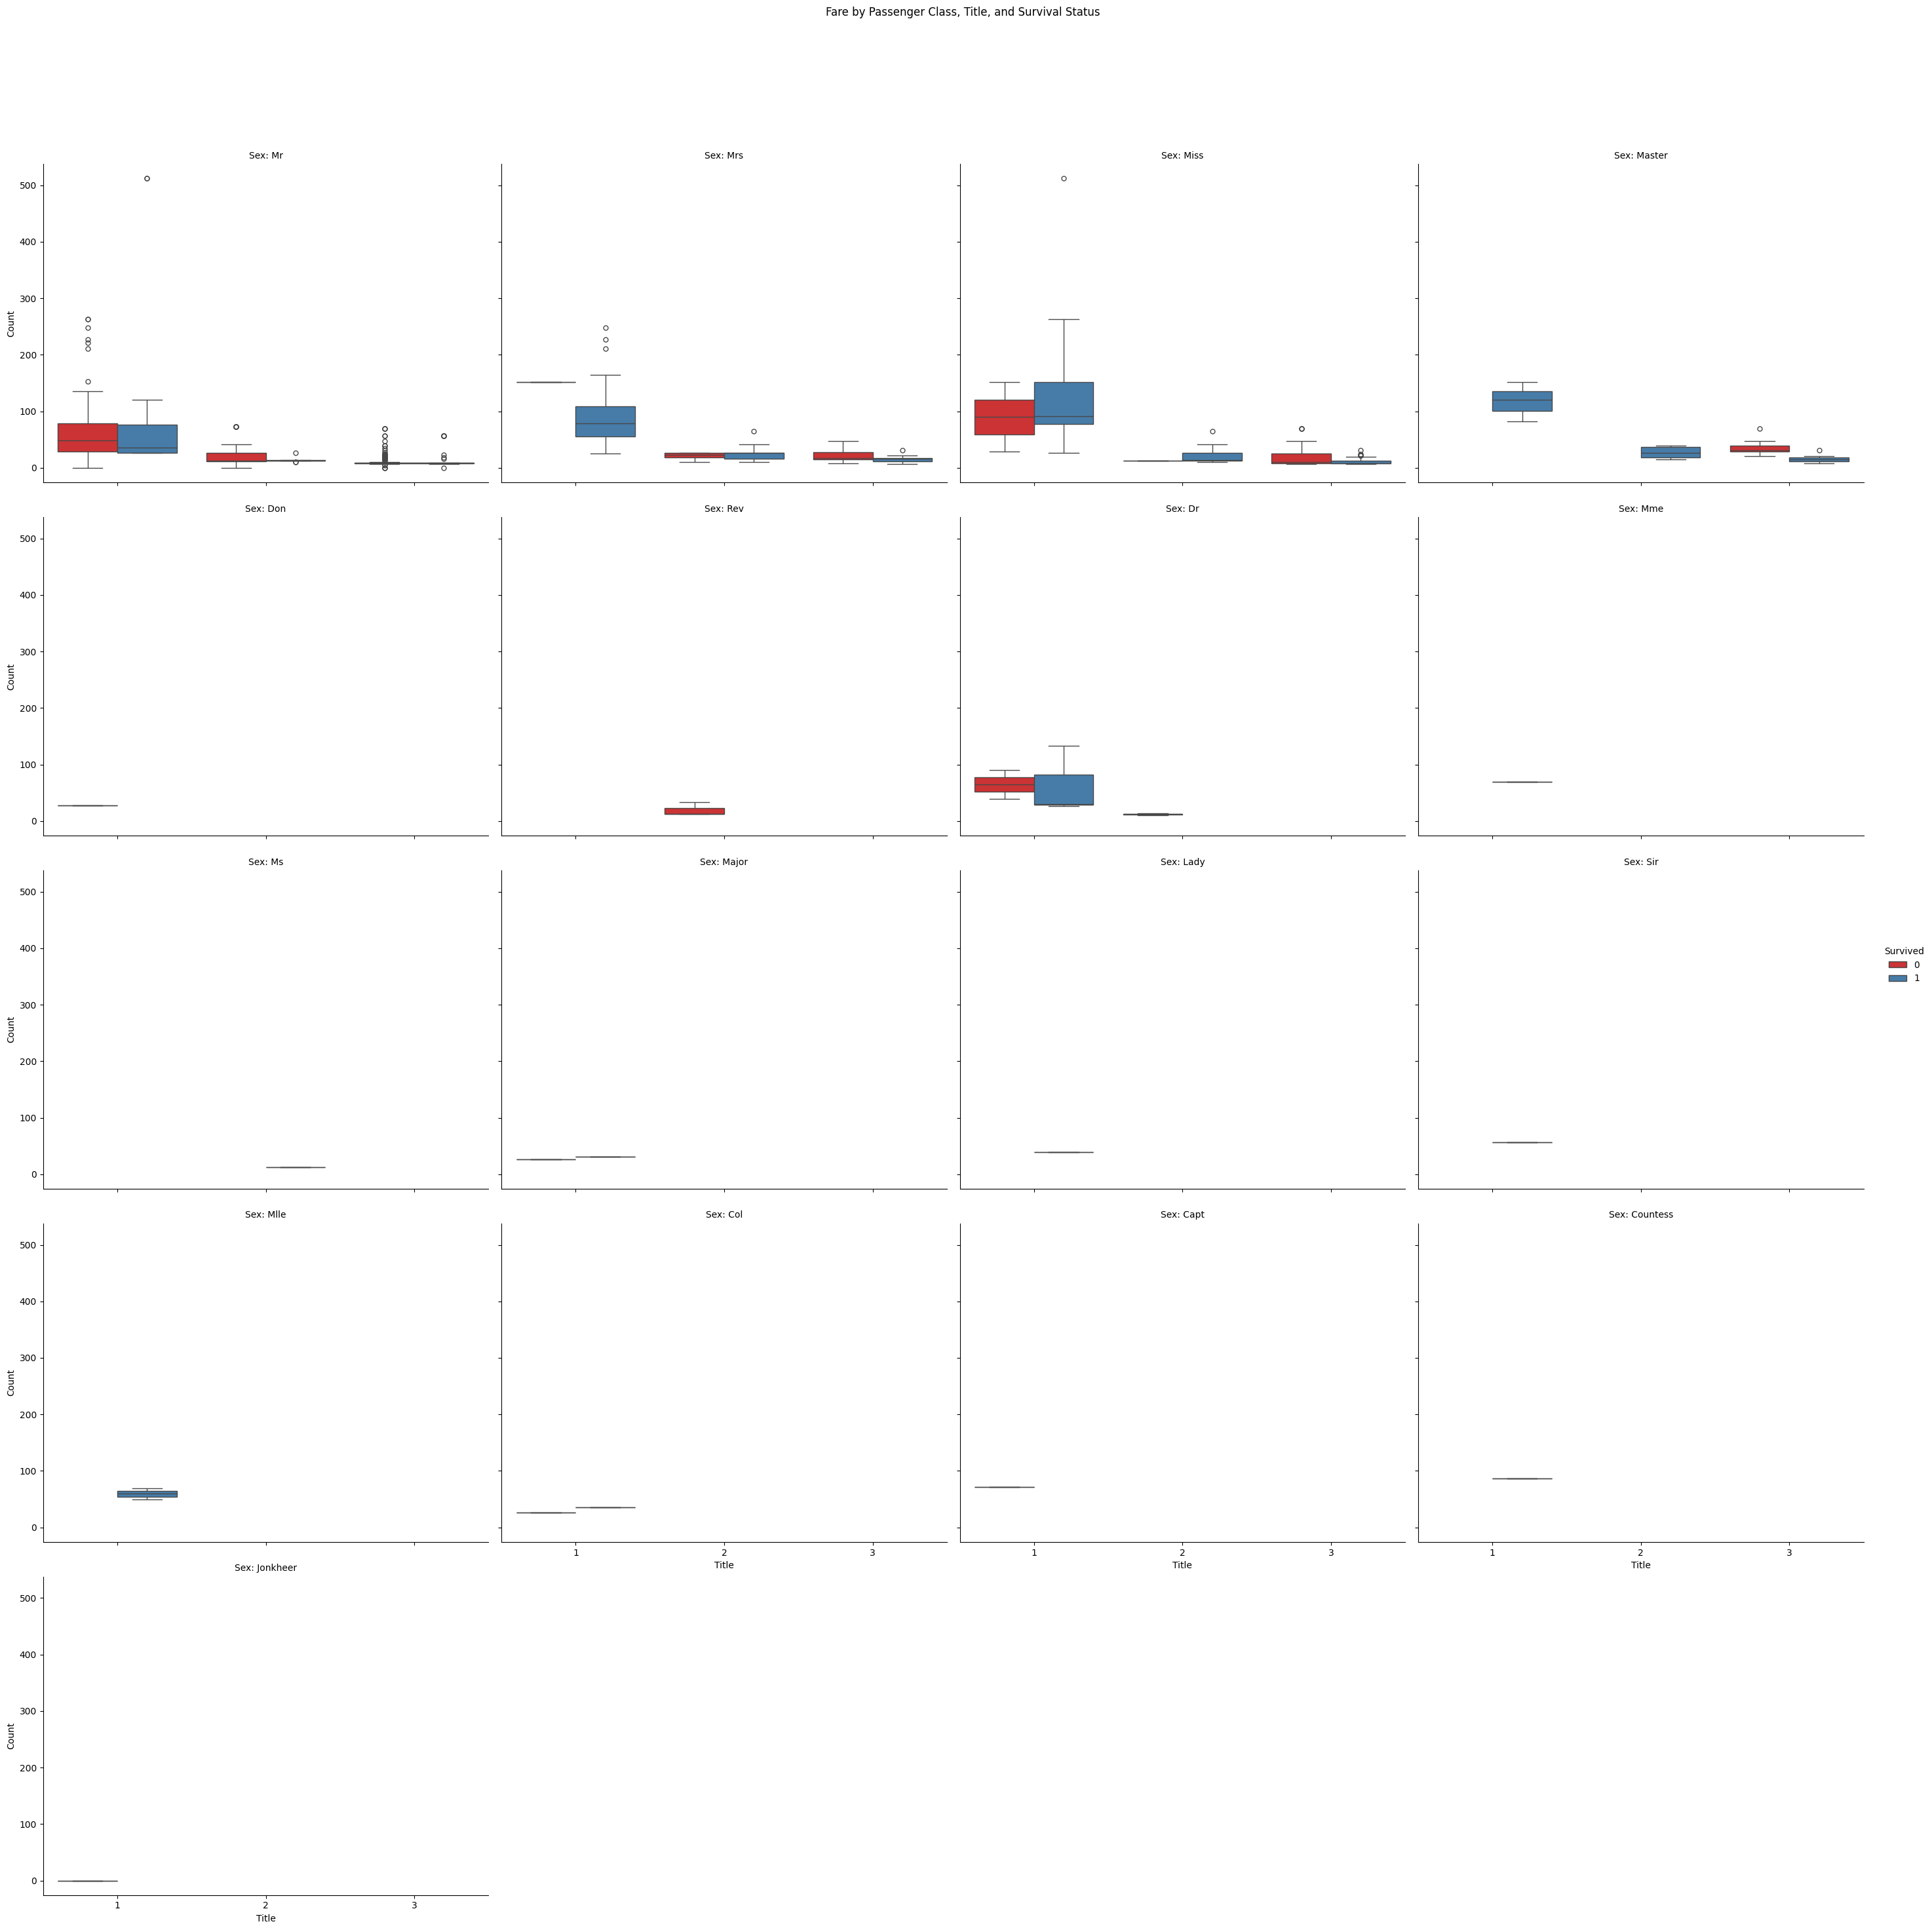

In [35]:
g = sns.catplot(x="PassagerClass", y="Fare", hue="Survived", col='Title',  data=titanic_df, kind="box", col_wrap=4, height=6, aspect=1.2, palette='Set1')


# Add title, axis labels, and subtitles,
g.set_axis_labels("Title", "Count")
g.set_titles("Sex: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fare by Passenger Class, Title, and Survival Status')

# Show the plot
plt.show()

In [36]:
# calculate the max far by passager class
titanic_df.groupby('PassagerClass')['Fare'].max()

PassagerClass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

### Multivariate Analysis

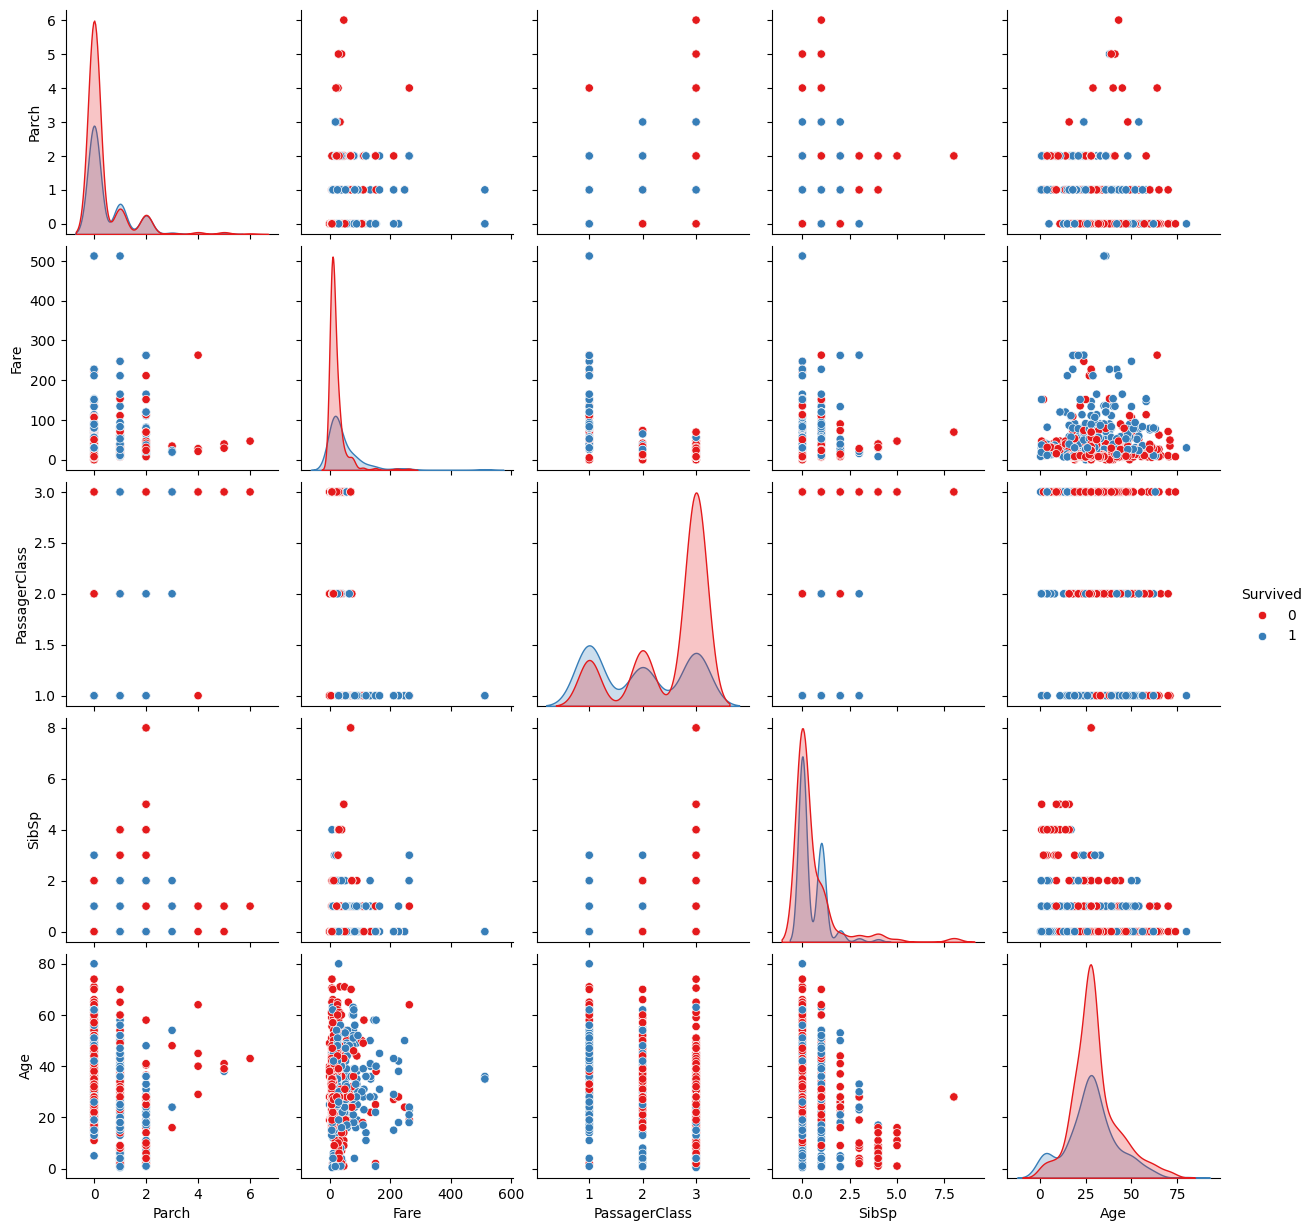

In [37]:
sns.pairplot(titanic_df, hue='Survived', vars = ['Parch', 'Fare', 'PassagerClass','SibSp', 'Age'], palette='Set1')
plt.show()

In [47]:
# encoding catergorical into one hot encoding and label encoding
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df =pd.get_dummies(titanic_df, columns=['Embarked', 'Title', 'PassagerClass'], drop_first=True)

# tranform boolean values to integer
bool_cols = titanic_df.select_dtypes(include=['bool']).columns
titanic_df[bool_cols] = titanic_df[bool_cols].astype(int)




KeyError: "None of [Index(['Embarked', 'Title', 'PassagerClass'], dtype='object')] are in the [columns]"

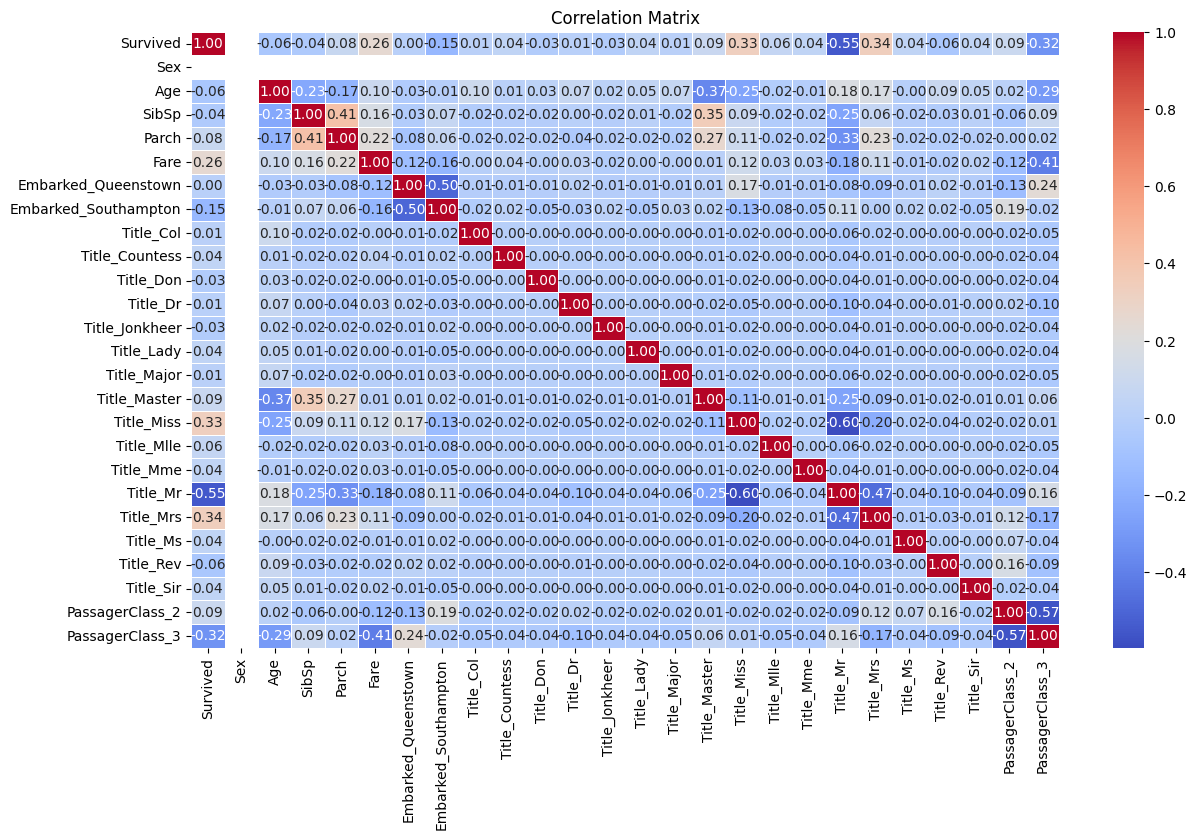

In [44]:
# make a correlation matrix with all the featueres
corr_matrix = titanic_df.corr()
# createa a heatmap
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Determine Significant variables through regression analysis


In [56]:
# perform regression identify relevant variables
# import sys
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [57]:
# prepare the features and the taret variable
y = titanic_df['Survived']
x = titanic_df.drop(columns=['Survived']) # 'Survived' remains in titanic_df

titanic_df.head(20)


KeyError: 'Survived'